In [56]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

In [57]:
# Create an empty list to store the points
points = []

random.seed(1)
# Generate and store 10 random points
for _ in range(5):
    x = random.uniform(0, 15)
    y = random.uniform(0, 15)
    points.append((x, y))

# Print the array of points
for point in points:
    print(point)

(2.0154636616860184, 12.71150605405849)
(11.45661928464921, 3.826035386091325)
(7.431526306379114, 6.742365971831072)
(9.773894590841444, 11.830850267032698)
(1.4078938016135234, 0.42521214783009464)


In [104]:
def show_initial_plot(fig, ax, points):

    ax.scatter([x[0] for x in points], [y[1] for y in points], c='b', marker='o', label='Points', s=4)  # Plot points

    display(fig)
    clear_output(wait=True)

    # time.sleep(1)
    
    return ax

# Function to update the plot by highlighting current hull points
def update_plot(fig, ax, current_hull, points):

    """Function to update the plot by highlighting current hull points

    Args:
        ax: point object
        canvas: canvas object / where the plot is drawn
        current_hull: current hull points

    Returns:
        ax: point object (scatter plot of current hull points)
        canvas: canvas object / where the plot is drawn
    """
    # Convert the arrays to tuples for comparison
    points1_set = set(map(tuple, current_hull))
    points2_set = set(map(tuple, points))

    # Find points in points_array1 but not in points_array2
    result_set = points2_set - points1_set

    # Convert the result back to a NumPy array of points
    not_convex_hull_points = np.array(list(result_set))

    print("Current hull points: ", current_hull)
    print("Points not in convex hull: ", not_convex_hull_points)


    if len(current_hull) > 1:
        # Scatter plot of current hull points
        ax.scatter([x[0] for x in current_hull], [y[1] for y in current_hull], c='r', marker='o', label='Highlighted Points')
    
    elif len(current_hull) == 1:

        ax.scatter(current_hull[0][0], current_hull[0][1], c='r', marker='o', label='Highlighted Points')
    

    if len(not_convex_hull_points) > 1:
        # Scatter plot of current hull points
        ax.scatter([x[0] for x in not_convex_hull_points], [y[1] for y in not_convex_hull_points], c='b', marker='o', label='Highlighted Points')
    
    elif len(not_convex_hull_points) == 1:

        ax.scatter(not_convex_hull_points[0][0], not_convex_hull_points[0][1], c='r', marker='o', label='Highlighted Points')


    display(fig)
    clear_output(wait=True)

    time.sleep(1)

    return ax

In [69]:
def is_left_turn(p, q, r):
    """Returns True if the turn of pq -> qr is counter-clockwise and False otherwise."""

    return (q[0] - p[0])*(r[1] - p[1]) > (r[0] - p[0])*(q[1] - p[1])

In [96]:
def draw_point_line(fig, ax, current_hull_point, point):

    # Plot the connection between the last and first points
    new_line = ax.plot([current_hull_point[0], point[0]], [current_hull_point[1], point[1]], 'r-', picker=5, linewidth=2)

    # Plot dashed lines connecting current hull points
    # ax.plot(current_hull[:, 0], current_hull[:, 1], 'k--', picker=5, linewidth=1)
    
    display(fig)
    clear_output(wait=True)

    # time.sleep(time_sleep)
    
    return ax, new_line

In [111]:
# Main function to calculate the convex hull using the Gift Wrapping algorithm
def andrews_algorithm(fig, ax, points):
        
    points = np.array(points)
    
    ax = show_initial_plot(fig, ax, points)

    points = sorted(points, key=lambda x: x[0])

    upper_hull = []
    # Create a list to store the lines
    temporary_lines = []

    for point in points:

        while len(upper_hull) > 1 and is_left_turn(upper_hull[-2], upper_hull[-1], point):

            upper_hull.pop()
            temporary_lines[-1].remove()
            update_plot(fig, ax, np.array(upper_hull), np.array(points))
       

        if len(upper_hull) > 0:

            ax, new_line = draw_point_line(fig, ax, upper_hull[-1], point)
            temporary_lines.append(new_line[0])

        upper_hull.append(point)
        update_plot(fig, ax, np.array(upper_hull), np.array(points))

    lower_hull = []

    for point in reversed(points):

        while len(lower_hull) > 1 and is_left_turn(lower_hull[-2], lower_hull[-1], point):

            temporary_lines[-1].set_color('blue')
            lower_hull.pop()

            temporary_lines[-1].remove()
            update_plot(fig, ax, np.concatenate((upper_hull, lower_hull)), np.array(points))

        if len(lower_hull) > 0:

            ax, new_line = draw_point_line(fig, ax, lower_hull[-1], point)
            temporary_lines.append(new_line[0])

        lower_hull.append(point)
        update_plot(fig, ax, np.concatenate((upper_hull, lower_hull)), np.array(points))


    # print(upper_hull[:-1] + lower_hull)

    # return upper_hull[:-1] + lower_hull 
    
    # current_hull_point = points[np.argmin(points[:, 0])]
    # convex_hull_points = []


    # convex_hull = []

    # p1 = min(points, key=lambda point: point[0])
    # p2 = max(points, key=lambda point: point[0])

    # # Remove the leftmost and rightmost points from the array
    # points.remove(p1)
    # points.remove(p2)

    # convex_hull = convex_hull + [p1, p2]

ValueError: list.remove(x): x not in list

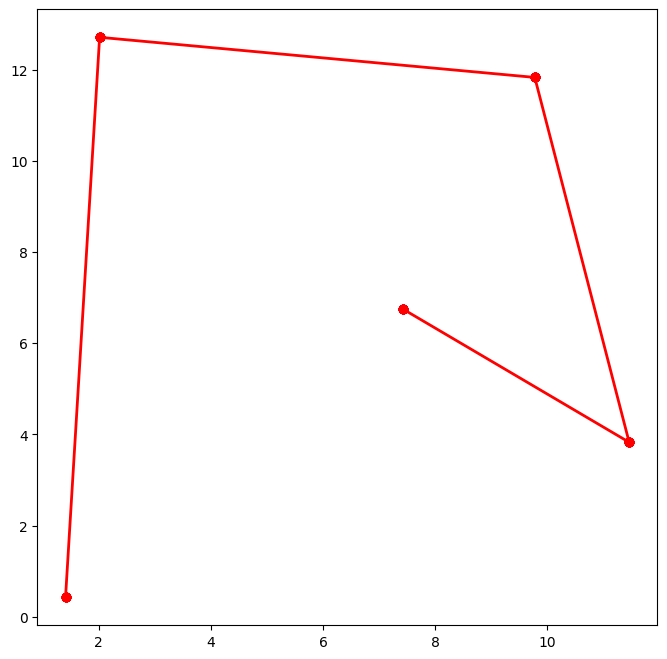

In [112]:
fig, ax = plt.subplots(figsize=(8, 8))

andrews_algorithm(fig, ax, points)